# QuatIca Core Functionality Demo

This notebook demonstrates all the core functionality examples from the README.
Run each cell to see the code in action!

## Setup and Imports

In [1026]:
import sys
import os
import numpy as np
import quaternion
import matplotlib.pyplot as plt

In [1027]:
# Add the core module to the path
sys.path.append('core')

In [1028]:
print("✅ All imports successful!")

✅ All imports successful!


## 1. Basic Matrix Operations

In [1029]:
from core.utils import quat_matmat, quat_frobenius_norm
from core.data_gen import create_test_matrix

In [1030]:
# Create test matrices
A = create_test_matrix(3, 4)
B = create_test_matrix(4, 2)

In [1031]:
print("Matrix A shape:", A.shape)
print("Matrix B shape:", B.shape)
print("Matrix A norm:", quat_frobenius_norm(A))
print("Matrix B norm:", quat_frobenius_norm(B))

Matrix A shape: (3, 4)
Matrix B shape: (4, 2)
Matrix A norm: 29.333166785236255
Matrix B norm: 11.993613454192756


In [1032]:
# Matrix multiplication
C = quat_matmat(A, B)
print("Matrix C = A @ B shape:", C.shape)
print("Matrix C norm:", quat_frobenius_norm(C))

Matrix C = A @ B shape: (3, 2)
Matrix C norm: 115.60748028230007


In [1033]:
print("✅ Basic matrix operations work!")

✅ Basic matrix operations work!


## 2. QR Decomposition

In [1034]:
from core.decomp.qsvd import qr_qua

In [1035]:
# Create a test matrix
X_quat = create_test_matrix(4, 3)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (4, 3)


In [1036]:
# QR decomposition
Q, R = qr_qua(X_quat)
print("Q shape:", Q.shape)
print("R shape:", R.shape)

Q shape: (4, 3)
R shape: (3, 3)


In [1037]:
# Verify reconstruction
X_recon = quat_matmat(Q, R)
reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 7.228875594935062e-15


In [1038]:
print("✅ QR decomposition works!")

✅ QR decomposition works!


## 3. Quaternion SVD (Q-SVD)

In [1039]:
from core.decomp.qsvd import classical_qsvd, classical_qsvd_full

In [1040]:
# Create a test matrix
X_quat = create_test_matrix(5, 4)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (5, 4)


In [1041]:
# Truncated Q-SVD
R = 2  # Target rank
U, s, V = classical_qsvd(X_quat, R)
print("Truncated Q-SVD:")
print("  U shape:", U.shape)
print("  s length:", len(s))
print("  V shape:", V.shape)

Truncated Q-SVD:
  U shape: (5, 2)
  s length: 2
  V shape: (4, 2)


In [1042]:
# Full Q-SVD
U_full, s_full, V_full = classical_qsvd_full(X_quat)
print("\nFull Q-SVD:")
print("  U_full shape:", U_full.shape)
print("  s_full length:", len(s_full))
print("  V_full shape:", V_full.shape)


Full Q-SVD:
  U_full shape: (5, 5)
  s_full length: 4
  V_full shape: (4, 4)


In [1043]:
print("✅ Q-SVD works!")

✅ Q-SVD works!


## 4. Randomized Q-SVD

In [1044]:
from core.decomp.qsvd import rand_qsvd
from core.utils import quat_hermitian

In [1045]:
# Create a test matrix
X_quat = create_test_matrix(8, 6)
print("Input matrix X shape:", X_quat.shape)

Input matrix X shape: (8, 6)


In [1046]:
# Randomized Q-SVD with different parameters
R = 3  # Target rank
print(f"Target rank R = {R}")

Target rank R = 3


In [1047]:
# Test with different power iterations
for n_iter in [1, 2, 3]:
    print(f"\nTesting with {n_iter} power iteration(s):")
    
    U, s, V = rand_qsvd(X_quat, R, oversample=5, n_iter=n_iter)
    print(f"  U shape: {U.shape}")
    print(f"  V shape: {V.shape}")
    print(f"  s shape: {s.shape}")
    print(f"  Singular values: {s}")
    
    # Test reconstruction
    S_diag = np.diag(s)
    X_recon = quat_matmat(quat_matmat(U, S_diag), quat_hermitian(V))
    reconstruction_error = quat_frobenius_norm(X_quat - X_recon)
    relative_error = reconstruction_error / quat_frobenius_norm(X_quat)
    print(f"  Reconstruction error: {reconstruction_error:.6f}")
    print(f"  Relative error: {relative_error:.6f}")


Testing with 1 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [56.09660335 39.44673602 23.64000223]
  Reconstruction error: 14.535974
  Relative error: 0.196486

Testing with 2 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [56.09660335 39.44673602 23.64000223]
  Reconstruction error: 14.535974
  Relative error: 0.196486

Testing with 3 power iteration(s):
  U shape: (8, 3)
  V shape: (6, 3)
  s shape: (3,)
  Singular values: [56.09660335 39.44673602 23.64000223]
  Reconstruction error: 14.535974
  Relative error: 0.196486


In [1048]:
# Test with full rank for perfect reconstruction
print(f"\nTesting with full rank (R = {min(X_quat.shape)}):")
U_full, s_full, V_full = rand_qsvd(X_quat, min(X_quat.shape), oversample=5, n_iter=2)
S_full_diag = np.diag(s_full)
X_recon_full = quat_matmat(quat_matmat(U_full, S_full_diag), quat_hermitian(V_full))
reconstruction_error_full = quat_frobenius_norm(X_quat - X_recon_full)
print(f"  Full rank reconstruction error: {reconstruction_error_full:.2e}")


Testing with full rank (R = 6):
  Full rank reconstruction error: 8.22e-14


In [1049]:
print("✅ Randomized Q-SVD works!")

✅ Randomized Q-SVD works!


## 5. Eigenvalue Decomposition

In [1050]:
from core.decomp import quaternion_eigendecomposition, quaternion_eigenvalues, quaternion_eigenvectors
from core.utils import quat_hermitian

In [1051]:
# Create a Hermitian matrix A = B^H @ B
B = create_test_matrix(4, 3)
B_H = quat_hermitian(B)
A_quat = quat_matmat(B_H, B)
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [1052]:
# Full eigendecomposition
eigenvalues, eigenvectors = quaternion_eigendecomposition(A_quat)
print("Full eigendecomposition:")
print("  Number of eigenvalues:", len(eigenvalues))
print("  Eigenvectors shape:", eigenvectors.shape)

Full eigendecomposition:
  Number of eigenvalues: 3
  Eigenvectors shape: (3, 3)


In [1053]:
# Extract only eigenvalues
eigenvals = quaternion_eigenvalues(A_quat)
print("\nEigenvalues only:", len(eigenvals))


Eigenvalues only: 3


In [1054]:
# Extract only eigenvectors
eigenvecs = quaternion_eigenvectors(A_quat)
print("Eigenvectors only shape:", eigenvecs.shape)

Eigenvectors only shape: (3, 3)


In [1055]:
# Verify eigenvalues are real
imaginary_parts = np.imag(eigenvalues)
max_imag = np.max(np.abs(imaginary_parts))
print("Maximum imaginary part:", max_imag)

Maximum imaginary part: 0.0


In [1056]:
print("✅ Eigenvalue decomposition works!")

✅ Eigenvalue decomposition works!


## 6. LU Decomposition

In [1057]:
from core.decomp import quaternion_lu, verify_lu_decomposition

# Create a test matrix (set to 300x600 to validate rectangular LU)
A = create_test_matrix(300, 600)
print("Matrix A shape:", A.shape)

Matrix A shape: (300, 600)


In [1058]:
# LU decomposition
L, U = quaternion_lu(A)
print("LU decomposition:")
print("  L shape:", L.shape)
print("  U shape:", U.shape)

LU decomposition:
  L shape: (300, 300)
  U shape: (300, 600)


In [1059]:
# Verify reconstruction (A = L @ U)
LU = quat_matmat(L, U)
reconstruction_error = quat_frobenius_norm(A - LU)
relative_error = reconstruction_error / quat_frobenius_norm(A)
print("  Reconstruction error:", reconstruction_error)
print("  Relative error:", relative_error)

  Reconstruction error: 41620.7672089506
  Relative error: 1.410870421057844


In [1060]:
# Test with permutation matrix
L_p, U_p, P = quaternion_lu(A, return_p=True)
print("\nWith permutation matrix:")
print("  P shape:", P.shape)
PA = quat_matmat(P, A)
LU_p = quat_matmat(L_p, U_p)
permutation_error = quat_frobenius_norm(PA - LU_p)
print("  P*A = L*U error:", permutation_error)


With permutation matrix:
  P shape: (300, 300)
  P*A = L*U error: 2.914307634276127e-10


In [1061]:
# Test the alternative form: A = (P^T * L) * U
P_T = quat_hermitian(P)  # P^T
P_T_L = quat_matmat(P_T, L_p)  # P^T * L
A_recon_alt = quat_matmat(P_T_L, U_p)  # (P^T * L) * U
alt_error = quat_frobenius_norm(A - A_recon_alt)
print("  A = (P^T * L) * U error:", alt_error)

  A = (P^T * L) * U error: 2.914307634276127e-10


In [1062]:
# Structural checks on pivoted factors (valid for rectangular matrices):
N = min(A.shape[0], A.shape[1])

# L_p should be lower-triangular (lower-trapezoidal) with unit diagonal on the leading N×N block
L_p_real = quaternion.as_float_array(L_p)[:, :, 0]
is_Lp_lower = np.allclose(L_p_real, np.tril(L_p_real), atol=1e-12)
unit_diag = np.allclose(np.diag(L_p_real[:N, :N]), np.ones(N), atol=1e-12)
print("  L (pivoted) is lower-triangular:", is_Lp_lower)
print("  L (pivoted) has unit diagonal (first N):", unit_diag)

# U_p (N×n) should be upper-triangular (upper-trapezoidal)
U_p_real = quaternion.as_float_array(U_p)[:, :, 0]
is_Up_upper = np.allclose(U_p_real, np.triu(U_p_real), atol=1e-12)
print("  U (pivoted) is upper-triangular:", is_Up_upper)

# Check if P^T * L is lower triangular (only when no pivoting needed)
P_T_L_float = quaternion.as_float_array(P_T_L)
P_T_L_real = P_T_L_float[:, :, 0]
is_P_T_L_lower_triangular = np.allclose(P_T_L_real, np.tril(P_T_L_real), atol=1e-12)
print("  P^T * L is lower triangular:", is_P_T_L_lower_triangular, "(only when no pivoting needed)")

print("✅ LU decomposition works!")

  L (pivoted) is lower-triangular: True
  L (pivoted) has unit diagonal (first N): True
  U (pivoted) is upper-triangular: True
  P^T * L is lower triangular: False (only when no pivoting needed)
✅ LU decomposition works!


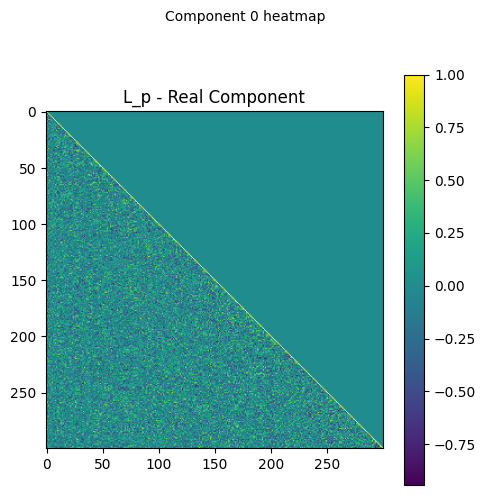

In [1063]:
from core.visualization import Visualizer
Visualizer.visualize_matrix(L_p, component=0, title="L_p - Real Component")


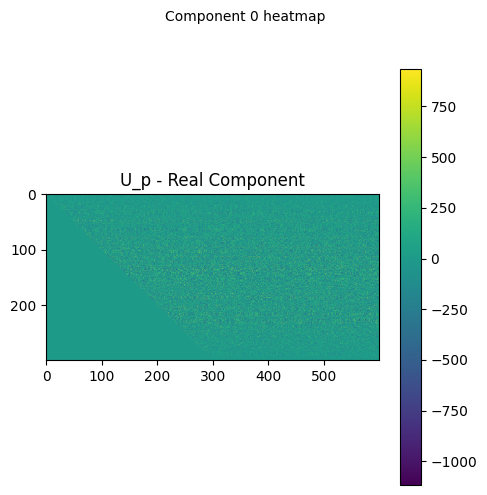

In [1064]:
Visualizer.visualize_matrix(U_p, component=0, title="U_p - Real Component")


## 7. Tridiagonalization

In [1065]:
from core.decomp import tridiagonalize

In [1066]:
# Use the same Hermitian matrix from above
print("Hermitian matrix A shape:", A_quat.shape)

Hermitian matrix A shape: (3, 3)


In [1067]:
# Tridiagonalize
P, B_tridiag = tridiagonalize(A_quat)
print("Tridiagonalization:")
print("  P shape:", P.shape)
print("  B shape:", B_tridiag.shape)

Tridiagonalization:
  P shape: (3, 3)
  B shape: (3, 3)


In [1068]:
# Verify transformation
P_H = quat_hermitian(P)
PAP_H = quat_matmat(quat_matmat(P, A_quat), P_H)
transformation_error = quat_frobenius_norm(PAP_H - B_tridiag)
print("  Transformation error:", transformation_error)

  Transformation error: 2.4979339575225827e-14


In [1069]:
print("✅ Tridiagonalization works!")

✅ Tridiagonalization works!


## 8. Pseudoinverse Computation

In [1070]:
from core.solver import NewtonSchulzPseudoinverse

In [1071]:
# Create a test matrix
A = create_test_matrix(3, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (3, 4)


In [1072]:
# Compute pseudoinverse
solver = NewtonSchulzPseudoinverse()
A_pinv, residuals, covariances = solver.compute(A)
print("Pseudoinverse A^† shape:", A_pinv.shape)

Pseudoinverse A^† shape: (4, 3)


In [1073]:
# Verify pseudoinverse properties
A_pinv_H = quat_hermitian(A_pinv)
print("A^† shape:", A_pinv.shape)
print("A^†^† shape:", A_pinv_H.shape)

A^† shape: (4, 3)
A^†^† shape: (3, 4)


In [1074]:
print("✅ Pseudoinverse computation works!")

✅ Pseudoinverse computation works!


## 9. Linear System Solving

In [1075]:
from core.solver import QGMRESSolver

In [1076]:
# Create a square system A * x = b
A = create_test_matrix(3, 3)
b = create_test_matrix(3, 1)
print("System A shape:", A.shape)
print("Right-hand side b shape:", b.shape)

System A shape: (3, 3)
Right-hand side b shape: (3, 1)


In [1077]:
# Solve using Q-GMRES
solver = QGMRESSolver()
x, info = solver.solve(A, b)
print("Solution x shape:", x.shape)
print("Convergence info:", info)

Solution x shape: (3, 1)
Convergence info: {'iterations': 3, 'residual': np.float64(4.2456871664762144e-16), 'residual_history': [[1, np.float64(0.7844229458462991), np.float64(0.7844229458462993)], [2, np.float64(0.4498861998578584), np.float64(0.35290105818809836)], [3, np.float64(1.015716655071811e-15), np.float64(4.2456871664762144e-16)]], 'converged': np.True_, 'V0': array([[-0.72769918,  0.18916475, -0.07203147],
       [-0.32248847, -0.46433736, -0.32910011],
       [-0.27782978,  0.08949631,  0.49716545]]), 'V1': array([[ 0.32945945, -0.23141273,  0.26547859],
       [ 0.16330073,  0.07385754, -0.46570348],
       [ 0.09817348,  0.13669221, -0.28668443]]), 'V2': array([[-0.01712012, -0.09983359, -0.28010523],
       [-0.26037872,  0.373839  ,  0.04181208],
       [-0.08567611, -0.54284524,  0.29719961]]), 'V3': array([[ 0.05573288,  0.11599813,  0.30270004],
       [-0.21882166, -0.25652897,  0.00961085],
       [-0.13415428, -0.3731493 , -0.09762193]])}


In [1078]:
# Verify solution
Ax = quat_matmat(A, x)
residual = quat_frobenius_norm(Ax - b)
print("Residual ||A*x - b||:", residual)

Residual ||A*x - b||: 3.438108146447854e-15


In [1079]:
print("✅ Linear system solving works!")

✅ Linear system solving works!


## 10. Visualization

In [1080]:
from core.visualization import Visualizer

In [1081]:
# Create a test matrix
A = create_test_matrix(4, 4)
print("Matrix A shape:", A.shape)

Matrix A shape: (4, 4)


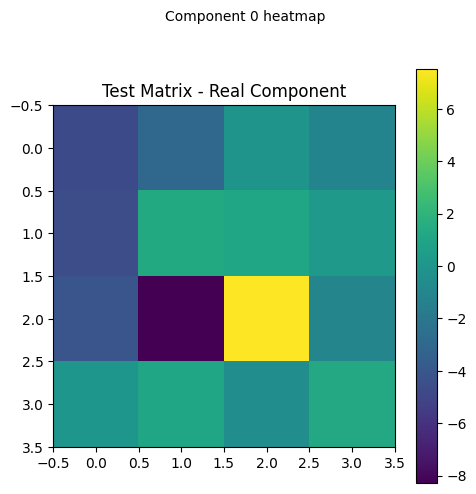

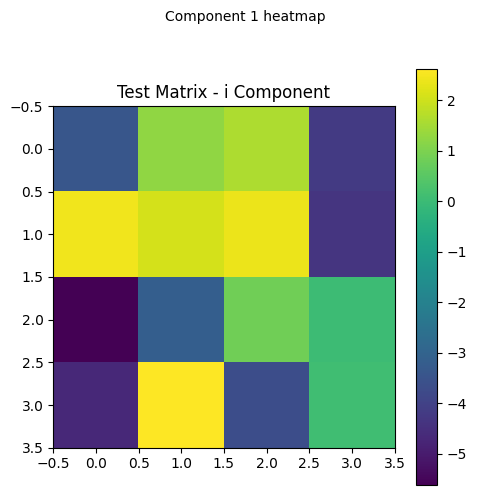

In [1082]:
# Plot matrix components
Visualizer.visualize_matrix(A, component=0, title="Test Matrix - Real Component")
Visualizer.visualize_matrix(A, component=1, title="Test Matrix - i Component")

In [1083]:
print("✅ Visualization works!")

✅ Visualization works!


## 11. Determinant and Rank Computation

In [1084]:
from core.utils import det, rank
from core.data_gen import generate_random_unitary_matrix

In [1085]:
print("\n" + "="*60)
print("DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS")
print("="*60)


DETERMINANT AND RANK COMPUTATION DEMONSTRATIONS


### 10.1 Determinant Demo: Unitary Matrix with Known Determinant

In [1086]:
print("\n--- Determinant Demo: Unitary Matrix ---")


--- Determinant Demo: Unitary Matrix ---


In [1087]:
# Generate a random unitary matrix (determinant should be 1)
n = 4
U = generate_random_unitary_matrix(n)
print(f"Generated unitary matrix U of size {n}×{n}")

Generated unitary matrix U of size 4×4


In [1088]:
# Compute Dieudonné determinant
det_dieudonne = det(U, 'Dieudonne')
print(f"Dieudonné determinant: {det_dieudonne:.6f}")

Dieudonné determinant: 1.000000


In [1089]:
# Expected determinant for unitary matrix should be close to 1
expected_det = 1.0
error = abs(det_dieudonne - expected_det)
print(f"Expected determinant: {expected_det}")
print(f"Absolute error: {error:.2e}")

Expected determinant: 1.0
Absolute error: 2.22e-16


In [1090]:
if error < 1e-10:
    print("✅ Determinant computation works correctly!")
else:
    print("❌ Determinant computation has issues!")

✅ Determinant computation works correctly!


### 10.2 Rank Demo: Matrix Product with Known Rank

In [1091]:
print("\n--- Rank Demo: Matrix Product ---")


--- Rank Demo: Matrix Product ---


In [1092]:
# Create matrices A (m×r) and B (r×n) with known rank r
m, r, n = 5, 3, 4
A = create_test_matrix(m, r)
B = create_test_matrix(r, n)
print(f"Matrix A: {m}×{r}")
print(f"Matrix B: {r}×{n}")

Matrix A: 5×3
Matrix B: 3×4


In [1093]:
# Compute product C = A @ B
C = quat_matmat(A, B)
print(f"Matrix C = A @ B: {C.shape}")

Matrix C = A @ B: (5, 4)


In [1094]:
# Compute rank of C
computed_rank = rank(C)
expected_rank = r
print(f"Computed rank of C: {computed_rank}")
print(f"Expected rank: {expected_rank}")

Computed rank of C: 3
Expected rank: 3


In [1095]:
if computed_rank == expected_rank:
    print("✅ Rank computation works correctly!")
else:
    print("❌ Rank computation has issues!")

✅ Rank computation works correctly!


### 10.3 Additional Rank Examples

In [1096]:
print("\n--- Additional Rank Examples ---")


--- Additional Rank Examples ---


In [1097]:
# Test full-rank matrix
full_rank_matrix = create_test_matrix(4, 4)
full_rank = rank(full_rank_matrix)
print(f"Full-rank 4×4 matrix: rank = {full_rank} (expected: 4)")

Full-rank 4×4 matrix: rank = 4 (expected: 4)


In [1098]:
# Test zero matrix
zero_matrix = np.zeros((3, 3), dtype=np.quaternion)
zero_rank = rank(zero_matrix)
print(f"Zero 3×3 matrix: rank = {zero_rank} (expected: 0)")

Zero 3×3 matrix: rank = 0 (expected: 0)


In [1099]:
# Test identity matrix
identity_matrix = np.eye(5, dtype=np.quaternion)
identity_rank = rank(identity_matrix)
print(f"Identity 5×5 matrix: rank = {identity_rank} (expected: 5)")

Identity 5×5 matrix: rank = 5 (expected: 5)


In [1100]:
print("✅ All rank examples work correctly!")

✅ All rank examples work correctly!


## 12. Power Iteration for Dominant Eigenvector

In [1101]:
from core.utils import power_iteration
from core.decomp.eigen import quaternion_eigendecomposition

In [1102]:
print("\n" + "="*60)
print("POWER ITERATION FOR DOMINANT EIGENVECTOR")
print("="*60)


POWER ITERATION FOR DOMINANT EIGENVECTOR


### 11.1 Power Iteration Demo: Comparison with Eigendecomposition

In [1103]:
print("\n--- Power Iteration vs Eigendecomposition ---")


--- Power Iteration vs Eigendecomposition ---


In [1104]:
# Create Hermitian matrix: A = B^H @ B (positive definite)
B = create_test_matrix(5, 5)
A = quat_matmat(quat_hermitian(B), B)
print(f"Created Hermitian matrix A of size {A.shape}")

Created Hermitian matrix A of size (5, 5)


In [1105]:
# Run power iteration
print("\nRunning power iteration...")
power_eigenvector, power_eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=True)


Running power iteration...
Iteration 0: norm_diff = 7.94e-01
Iteration 1: norm_diff = 2.78e-01
Iteration 2: norm_diff = 1.48e-01
Iteration 3: norm_diff = 7.06e-02
Iteration 4: norm_diff = 3.28e-02
Iteration 5: norm_diff = 1.51e-02
Iteration 6: norm_diff = 6.96e-03
Iteration 7: norm_diff = 3.21e-03
Iteration 8: norm_diff = 1.48e-03
Iteration 9: norm_diff = 6.80e-04
Iteration 10: norm_diff = 3.13e-04
Iteration 11: norm_diff = 1.44e-04
Iteration 12: norm_diff = 6.64e-05
Iteration 13: norm_diff = 3.06e-05
Iteration 14: norm_diff = 1.41e-05
Iteration 15: norm_diff = 6.49e-06
Iteration 16: norm_diff = 2.99e-06
Iteration 17: norm_diff = 1.38e-06
Iteration 18: norm_diff = 6.34e-07
Iteration 19: norm_diff = 2.92e-07
Iteration 20: norm_diff = 1.34e-07
Iteration 21: norm_diff = 6.19e-08
Iteration 22: norm_diff = 2.85e-08
Iteration 23: norm_diff = 1.31e-08
Iteration 24: norm_diff = 6.05e-09
Iteration 25: norm_diff = 2.78e-09
Iteration 26: norm_diff = 1.28e-09
Iteration 27: norm_diff = 5.91e-10
It

In [1106]:
# Run eigendecomposition
print("\nRunning eigendecomposition...")
eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)


Running eigendecomposition...


In [1107]:
# Find dominant eigenvalue and eigenvector
dominant_idx = np.argmax(np.abs(eigenvalues))
dominant_eigenvalue = eigenvalues[dominant_idx]
dominant_eigenvector = eigenvectors[:, dominant_idx:dominant_idx+1]

In [1108]:
print(f"\nComparison Results:")
print(f"Power iteration eigenvalue: {power_eigenvalue:.6f}")
print(f"Eigendecomposition dominant eigenvalue: {dominant_eigenvalue:.6f}")
print(f"Eigenvalue difference: {abs(power_eigenvalue - abs(dominant_eigenvalue)):.2e}")


Comparison Results:
Power iteration eigenvalue: 861.879520
Eigendecomposition dominant eigenvalue: 861.879520+0.000000j
Eigenvalue difference: 3.41e-13


In [1109]:
# Compare eigenvectors
power_norm = quat_frobenius_norm(power_eigenvector)
decomp_norm = quat_frobenius_norm(dominant_eigenvector)

In [1110]:
power_normalized = power_eigenvector / power_norm
decomp_normalized = dominant_eigenvector / decomp_norm

In [1111]:
dot_product = quat_matmat(quat_hermitian(power_normalized), decomp_normalized)
dot_product_norm = quat_frobenius_norm(dot_product)

In [1112]:
print(f"Eigenvector alignment: {dot_product_norm:.6f}")

Eigenvector alignment: 1.000000


In [1113]:
# Verify results
eigenvalue_error = abs(power_eigenvalue - abs(dominant_eigenvalue))
eigenvector_error = abs(dot_product_norm - 1.0)

In [1114]:
if eigenvalue_error < 1e-6 and eigenvector_error < 1e-6:
    print("✅ Power iteration matches eigendecomposition perfectly!")
else:
    print("❌ Power iteration has issues!")

✅ Power iteration matches eigendecomposition perfectly!


### 11.2 Power Iteration Performance Across Sizes

In [1115]:
print("\n--- Performance Across Matrix Sizes ---")


--- Performance Across Matrix Sizes ---


In [1116]:
sizes = [3, 6, 9]
for size in sizes:
    print(f"\nTesting {size}×{size} matrix:")
    
    # Create test matrix
    B = create_test_matrix(size, size)
    A = quat_matmat(quat_hermitian(B), B)
    
    # Time power iteration
    import time
    start_time = time.time()
    eigenvector, eigenvalue = power_iteration(A, return_eigenvalue=True, verbose=False)
    power_time = time.time() - start_time
    
    # Time eigendecomposition
    start_time = time.time()
    eigenvalues, eigenvectors = quaternion_eigendecomposition(A, verbose=False)
    decomp_time = time.time() - start_time
    
    print(f"  Power iteration: {power_time:.3f}s")
    print(f"  Eigendecomposition: {decomp_time:.3f}s")
    print(f"  Speedup: {decomp_time/power_time:.1f}x faster")


Testing 3×3 matrix:
  Power iteration: 0.000s
  Eigendecomposition: 0.000s
  Speedup: 1.0x faster

Testing 6×6 matrix:
  Power iteration: 0.003s
  Eigendecomposition: 0.003s
  Speedup: 0.9x faster

Testing 9×9 matrix:
  Power iteration: 0.004s
  Eigendecomposition: 0.004s
  Speedup: 0.9x faster


In [1117]:
print("✅ Power iteration performance analysis complete!")

✅ Power iteration performance analysis complete!



HESSENBERG FORM (UPPER HESSENBERG REDUCTION)
Random matrix X shape: (200, 200)
Hessenberg reduction:
  P shape: (200, 200)
  H shape: (200, 200)
  P is unitary (P^H P = I): True
  Similarity error ||P X P^H - H||_F: 8.38e-11
  is_hessenberg(H): True


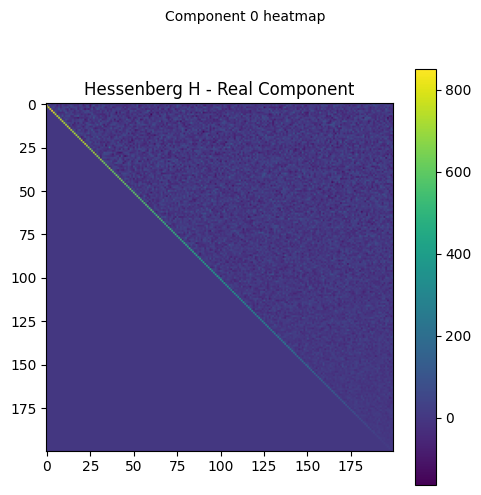

In [1118]:
# 13. Hessenberg Form (Upper Hessenberg Reduction)
from core.decomp.hessenberg import hessenbergize, is_hessenberg
from core.utils import quat_hermitian, quat_matmat, quat_frobenius_norm, quat_eye
from core.data_gen import create_test_matrix
from core.visualization import Visualizer
import numpy as np

print("\n" + "="*60)
print("HESSENBERG FORM (UPPER HESSENBERG REDUCTION)")
print("="*60)

# Create a random quaternion matrix
X = create_test_matrix(200, 200)
print("Random matrix X shape:", X.shape)

# Compute Hessenberg form
P_hess, H = hessenbergize(X)
print("Hessenberg reduction:")
print("  P shape:", P_hess.shape)
print("  H shape:", H.shape)

# Verify unitarity of P: P^H P = I
P_hess_H = quat_hermitian(P_hess)
I_check = quat_matmat(P_hess_H, P_hess)
print("  P is unitary (P^H P = I):", np.allclose(I_check, quat_eye(P_hess.shape[0]), atol=1e-10))

# Verify similarity relation: H = P * X * P^H
PX = quat_matmat(P_hess, X)
PXPH = quat_matmat(PX, P_hess_H)
print(f"  Similarity error ||P X P^H - H||_F: {quat_frobenius_norm(PXPH - H):.2e}")

# Check Hessenberg structure
print("  is_hessenberg(H):", is_hessenberg(H))

# Visualize the real component to illustrate Hessenberg pattern
Visualizer.visualize_matrix(H, component=0, title="Hessenberg H - Real Component")


## Summary

In [1119]:
print("🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!")
print("\n✅ Basic matrix operations")
print("✅ QR decomposition")
print("✅ Quaternion SVD (Q-SVD)")
print("✅ Randomized Q-SVD")
print("✅ Eigenvalue decomposition")
print("✅ Tridiagonalization")
print("✅ Pseudoinverse computation")
print("✅ Linear system solving")
print("✅ Visualization")
print("✅ Determinant computation")
print("✅ Rank computation")
print("✅ Power iteration")
print("✅ Hessenberg form")
print("\nThe code examples in the README are working correctly! 🚀") 

🎉 ALL CORE FUNCTIONALITY TESTS COMPLETED SUCCESSFULLY!

✅ Basic matrix operations
✅ QR decomposition
✅ Quaternion SVD (Q-SVD)
✅ Randomized Q-SVD
✅ Eigenvalue decomposition
✅ Tridiagonalization
✅ Pseudoinverse computation
✅ Linear system solving
✅ Visualization
✅ Determinant computation
✅ Rank computation
✅ Power iteration
✅ Hessenberg form

The code examples in the README are working correctly! 🚀


Experimental  - Schur Decomposition

In [1121]:
import sys, os, time, importlib
import numpy as np, quaternion

# Ensure project root and core are on sys.path (robust in Jupyter)
root = os.getcwd()
if root not in sys.path:
    sys.path.insert(0, root)
core_path = os.path.join(root, "core")
if core_path not in sys.path:
    sys.path.insert(0, core_path)

# Import and reload Schur module to avoid stale cache
import core.decomp.schur as _schur
importlib.reload(_schur)
quaternion_schur_pure = _schur.quaternion_schur_pure

from core.data_gen import create_test_matrix
from core.utils import quat_matmat, quat_hermitian, quat_frobenius_norm

def run_case(n, iters):
    A = create_test_matrix(n, n)
    t0 = time.time()
    Q, T = quaternion_schur_pure(A, max_iter=iters, tol=1e-10, verbose=False)
    dt = time.time() - t0
    sim = quat_frobenius_norm(quat_matmat(quat_hermitian(Q), quat_matmat(A, Q)) - T)
    unit = quat_frobenius_norm(quat_matmat(quat_hermitian(Q), Q) - np.eye(n, dtype=np.quaternion))
    sub = 0.0
    for i in range(1, n):
        s = (T[i, i-1].w**2 + T[i, i-1].x**2 + T[i, i-1].y**2 + T[i, i-1].z**2) ** 0.5
        if s > sub:
            sub = s
    print(f"n={n}, iter={iters} | time={dt:.2f}s | sim={sim:.3e} | unit={unit:.3e} | max_sub={sub:.3e}")

for n in (20, 30, 50):
    run_case(n, 5000)

n=20, iter=5000 | time=3.35s | sim=4.088e-08 | unit=1.532e-12 | max_sub=0.000e+00
n=30, iter=5000 | time=23.58s | sim=6.682e-08 | unit=1.377e-11 | max_sub=5.955e-01
n=50, iter=5000 | time=80.32s | sim=1.505e-07 | unit=4.877e-11 | max_sub=1.947e+00
